<a href="https://colab.research.google.com/github/leonardo3108/ia025a/blob/main/Exercicios/Aula%201%20-%20Entrega%20-%20Exerc%C3%ADcios%20Introdut%C3%B3rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esté um notebook Colab contendo exercícios de programação em python, numpy e pytorch.

## Coloque seu nome

In [ ]:
print('Meu nome é: Leonardo Augusto da Silva Pacheco. RA 201914.')

Meu nome é: Leonardo Augusto da Silva Pacheco. RA 201914.


# Parte 1:

##Exercícios de Processamento de Dados

Nesta parte pode-se usar as bibliotecas nativas do python como a `collections`, `re` e `random`. Também pode-se usar o NumPy.

##Exercício 1.1
Crie um dicionário com os `k` itens mais frequentes de uma lista.

Por exemplo, dada a lista de itens `L=['a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a']` e `k=2`, o resultado deve ser um dicionário cuja chave é o item e o valor é a sua frequência: {'a': 4, 'e': 3}

In [ ]:
from collections import Counter

def top_k(L, k):
    return dict(Counter(L).most_common(k))

Mostre que sua implementação está correta usando uma entrada com poucos itens:

In [ ]:
L = ['f', 'a', 'a', 'd', 'b', 'd', 'c', 'e', 'a', 'b', 'e', 'e', 'a', 'd']
k = 3
resultado = top_k(L=L, k=k)
print(f'resultado: {resultado}')

resultado: {'a': 4, 'd': 3, 'e': 3}


Mostre que sua implementação é eficiente usando uma entrada com 10M de itens:

In [ ]:
import random
L = random.choices('abcdefghijklmnopqrstuvwxyz', k=10_000_000)
k = 10000

In [ ]:
%%timeit
resultado = top_k(L=L, k=k)

1 loop, best of 5: 539 ms per loop


## Exercício 1.2

Em processamento de linguagem natural, é comum convertemos as palavras de um texto para uma lista de identificadores dessas palavras. Dado o dicionário `V` abaixo onde as chaves são palavras e os valores são seus respectivos identificadores, converta o texto `D` para uma lista de identificadores.

Palavras que não existem no dicionário deverão ser convertidas para o identificador do token `unknown`.

O código deve ser insensível a maiúsculas (case-insensitive).

Se atente que pontuações (vírgulas, ponto final, etc) também são consideradas palavras.

In [ ]:
import re
def tokens_to_ids(text, vocabulary):
    return [vocabulary.get(word.lower(), vocabulary['unknown']) for word in re.findall('\w+|[^\s\w]', text)]           

Mostre que sua implementação esta correta com um exemplo pequeno:

---



In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = 'Eu gosto de comer pizza.'

print(tokens_to_ids(D, V))

[1, 3, 2, 4, -1, 5]


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
V = {'eu': 1, 'de': 2, 'gosto': 3, 'comer': 4, '.': 5, 'unknown': -1}
D = ' '.join(1_000_000 * ['Eu gosto de comer pizza.'])

In [ ]:
%%timeit
resultado = tokens_to_ids(D, V)

1 loop, best of 5: 3.03 s per loop


## Exercício 1.3

Em aprendizado profundo é comum termos que lidar com arquivos muito grandes.

Dado um arquivo de texto onde cada item é separado por `\n`, escreva um programa que amostre `k` itens desse arquivo aleatoriamente.

Nota 1: Assuma amostragem de uma distribuição uniforme, ou seja, todos os itens tem a mesma probablidade de amostragem.

Nota 2: Assuma que o arquivo não cabe em memória.

Nota 3: Utilize apenas bibliotecas nativas do python.

In [ ]:
import random
from random import randint

#baseado em https://en.wikipedia.org/wiki/Reservoir_sampling

def sample(path: str, k: int):
    result = []
    for line_number, line in enumerate(open(path)):
        if line_number < k:
            result.append(line[:-1])
        else:
            r = randint(0, line_number)
            if r < k:
                result[r] = line[:-1]
    return result

Mostre que sua implementação está correta com um exemplo pequeno:

In [ ]:
filename = 'small.txt'
total_size = 100
n_samples = 10

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

samples = sample(path=filename, k=n_samples)
print(samples)
print(len(samples) == n_samples)

['line 0', 'line 74', 'line 26', 'line 28', 'line 78', 'line 82', 'line 61', 'line 17', 'line 15', 'line 31']
True


Mostre que sua implementação é eficiente com um exemplo grande:

In [ ]:
filename = 'large.txt'
total_size = 1_000_000
n_samples = 10000

with open(filename, 'w') as fout:
    fout.write('\n'.join(f'line {i}' for i in range(total_size)))

In [ ]:
%%timeit
samples = sample(path=filename, k=n_samples)
assert len(samples) == n_samples

1 loop, best of 5: 1.56 s per loop


# Parte 2:

##Exercícios de Numpy

Nesta parte deve-se usar apenas a biblioteca NumPy. Aqui não se pode usar o PyTorch.

##Exercício 2.1

Quantos operações de ponto flutuante (flops) de soma e de multiplicação tem a multiplicação matricial $AB$, sendo que a matriz $A$ tem tamanho $m \times n$ e a matriz $B$ tem tamanho $n \times p$?

Resposta:
- número de somas: $m \cdot p \cdot (n-1)$
- número de multiplicações: $m \cdot p \cdot n$

## Exercício 2.2

Em programação matricial, não se faz o loop em cada elemento da matriz,
mas sim, utiliza-se operações matriciais.

Dada a matriz `A` abaixo, calcule a média dos valores de cada linha sem utilizar laços explícitos.

Utilize apenas a biblioteca numpy.

In [ ]:
import numpy as np

In [ ]:
A = np.arange(24).reshape(4, 6)
print(A)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
np.mean(A, axis=1)

array([ 2.5,  8.5, 14.5, 20.5])

## Exercício 2.3

Seja a matriz $C$ que é a normalização da matriz $A$:
$$ C(i,j) = \frac{A(i,j) - A_{min}}{A_{max} - A_{min}} $$

Normalizar a matriz `A` do exercício acima de forma que seus valores fiquem entre 0 e 1.

In [ ]:
print((A - np.min(A)) / (np.max(A) - np.min(A)))

[[0.         0.04347826 0.08695652 0.13043478 0.17391304 0.2173913 ]
 [0.26086957 0.30434783 0.34782609 0.39130435 0.43478261 0.47826087]
 [0.52173913 0.56521739 0.60869565 0.65217391 0.69565217 0.73913043]
 [0.7826087  0.82608696 0.86956522 0.91304348 0.95652174 1.        ]]


## Exercício 2.4

Modificar o exercício anterior de forma que os valores de cada *coluna* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras colunas.


In [ ]:
print((A - np.min(A, axis = 0, keepdims = True)) /  (np.max(A, axis = 0, keepdims = True) - np.min(A, axis = 0, keepdims = True)))

[[0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         1.         1.         1.         1.         1.        ]]


## Exercício 2.5

Modificar o exercício anterior de forma que os valores de cada *linha* da matriz `A` sejam normalizados entre 0 e 1 independentemente dos valores das outras linhas.


In [ ]:
print((A - np.min(A, axis = 1, keepdims = True)) /  (np.max(A, axis = 1, keepdims = True) - np.min(A, axis = 1, keepdims = True)))

[[0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]
 [0.  0.2 0.4 0.6 0.8 1. ]]


## Exercício 2.6

A [função softmax](https://en.wikipedia.org/wiki/Softmax_function) é bastante usada em apredizado de máquina para converter uma lista de números para uma distribuição de probabilidade, isto é, os números ficarão normalizados entre zero e um e sua soma será igual à um.

Implemente a função softmax com suporte para batches, ou seja, o softmax deve ser aplicado a cada linha da matriz. Deve-se usar apenas a biblioteca numpy. Se atente que a exponenciação gera estouro de representação quando os números da entrada são muito grandes. Tente corrigir isto.

In [ ]:
import numpy as np


def softmax(A):
    '''
    Aplica a função de softmax à matriz `A`.

    Entrada:
      `A` é uma matriz M x N, onde M é o número de exemplos a serem processados
      independentemente e N é o tamanho de cada exemplo.
    
    Saída:
      Uma matriz M x N, onde a soma de cada linha é igual a um.
    '''
    e = np.exp(A - np.amax(A, axis = 1, keepdims = True))
    return e / e.sum(axis = 1, keepdims = True)

Mostre que sua implementação está correta usando uma matriz pequena como entrada:

In [ ]:
A = np.array([[0.5, -1, 1000],
              [-2,   0, 0.5]])
softmax(A)

array([[0.        , 0.        , 1.        ],
       [0.04861082, 0.35918811, 0.59220107]])

O código a seguir verifica se sua implementação do softmax está correta. 
- A soma de cada linha de A deve ser 1;
- Os valores devem estar entre 0 e 1

In [ ]:
np.allclose(softmax(A).sum(axis=1), 1) and softmax(A).min() >= 0 and softmax(A).max() <= 1

True

Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
A = np.random.uniform(low=-10, high=10, size=(128, 100_000))

In [ ]:
%%timeit
softmax(A)

1 loop, best of 5: 310 ms per loop


In [ ]:
SM = softmax(A)
np.allclose(SM.sum(axis=1), 1) and SM.min() >= 0 and SM.max() <= 1

True

## Exercício 2.7

A codificação one-hot é usada para codificar entradas categóricas. É uma codificação onde apenas um bit é 1 e os demais são zero, conforme a tabela a seguir.

| Decimal | Binary | One-hot
| ------- | ------ | -------
| 0 | 000    | 1 0 0 0 0 0 0 0
| 1 | 001    | 0 1 0 0 0 0 0 0
| 2 | 010    | 0 0 1 0 0 0 0 0
| 3 | 011    | 0 0 0 1 0 0 0 0
| 4 | 100    | 0 0 0 0 1 0 0 0
| 5 | 101    | 0 0 0 0 0 1 0 0
| 6 | 110    | 0 0 0 0 0 0 1 0
| 7 | 111    | 0 0 0 0 0 0 0 1

Implemente a função one_hot(y, n_classes) que codifique o vetor de inteiros y que possuem valores entre 0 e n_classes-1.


In [ ]:
def one_hot(y, n_classes):
    result = np.zeros((y.size, n_classes))   #result matrix initially with only zeros
    row_numbers = np.arange(y.size)          #array of row_numbers of result matrix, each element is row_number corresponding to each element of y
    result[row_numbers, y] = int(1.)               #for each element of y, row index is the order of element (registered in array row_numbers), column index is y itself (onehot), set this place to 1, others columns of the same line remain zeroed 
    return result

In [ ]:
N_CLASSES = 9
N_SAMPLES = 10
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int32)
print(y)
print(one_hot(y, N_CLASSES))

[1 6 8 2 5 1 1 3 4 1]
[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Mostre que sua implementação é eficiente usando uma matriz grande como entrada:

In [ ]:
N_SAMPLES = 100_000
N_CLASSES = 1_000
y = (np.random.rand((N_SAMPLES)) * N_CLASSES).astype(np.int32)

In [ ]:
%%timeit
one_hot(y, N_CLASSES)

1 loop, best of 5: 204 ms per loop


## Exercício 2.8

Implemente uma classe que normalize um array de pontos flutuantes `array_a` para a mesma média e desvio padrão de um outro array `array_b`, conforme exemplo abaixo:
```
array_a = np.array([-1, 1.5, 0])
array_b = np.array([1.4, 0.8, 0.3, 2.5])
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)  # Deve imprimir [0.3187798  2.31425165 1.11696854]
```

In [ ]:
class Normalizer:
    def __init__(self, base):
        b = np.array(base)
        self.m = b.mean()
        self.s = b.std()
    def __call__(self, array):
        b = np.array(array)
        m = b.mean()
        s = b.std()
        return (b - m) * self.s / s + self.m

Mostre que seu código está correto com o exemplo abaixo:

In [ ]:
array_a = [-1, 1.5, 0]
array_b = [1.4, 0.8, 0.3, 2.5]
normalize = Normalizer(array_b)
normalized_array = normalize(array_a)
print(normalized_array)

[0.3187798  2.31425165 1.11696854]


# Parte 3:

##Exercícios Pytorch: Grafo Computacional e Gradientes

Nesta parte pode-se usar quaisquer bibliotecas.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada através do cálculo automático do gradiente e construção dinâmica do grafo computacional.

## Grafo computacional

Seja um exemplo simples de uma função de perda J dada pela Soma dos Erros ao Quadrado (SEQ - Sum of Squared Errors): 
$$ J = \sum_i (x_i w - y_i)^2 $$
que pode ser reescrita como:
$$ \hat{y_i} = x_i w $$
$$ e_i = \hat{y_i} - y_i $$
$$ e2_i = e_i^2 $$
$$ J = \sum_i e2_i $$

As redes neurais são treinadas através da minimização de uma função de perda usando o método do gradiente descendente. Para ajustar o parâmetro $w$ precisamos calcular o gradiente $  \frac{ \partial J}{\partial w} $. Usando a
regra da cadeia podemos escrever:
$$ \frac{ \partial J}{\partial w} = \frac{ \partial J}{\partial e2_i} \frac{ \partial e2_i}{\partial e_i} \frac{ \partial e_i}{\partial \hat{y_i} } \frac{ \partial \hat{y_i}}{\partial w}$$ 

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

As quatro expressões acima, para o cálculo do J podem ser representadas pelo grafo computacional visualizado a seguir: os círculos são as variáveis (tensores), os quadrados são as operações, os números em preto são os cálculos durante a execução das quatro expressões para calcular o J (forward, predict). O cálculo do gradiente, mostrado em vermelho, é calculado pela regra da cadeia, de trás para frente (backward).

<img src="https://raw.githubusercontent.com/robertoalotufo/files/master/figures/GrafoComputacional.png" width="600pt"/>

Para entender melhor o funcionamento do grafo computacional com os tensores, recomenda-se leitura em:

https://pytorch.org/docs/stable/notes/autograd.html

In [ ]:
import torch

In [ ]:
torch.__version__

'1.10.0+cu111'

**Tensor com atributo .requires_grad=True**

Quando um tensor possui o atributo `requires_grad` como verdadeiro, qualquer expressão que utilizar esse tensor irá construir um grafo computacional para permitir posteriormente, após calcular a função a ser derivada, poder usar a regra da cadeia e calcular o gradiente da função em termos dos tensores que possuem o atributo `requires_grad`.


In [ ]:
y = torch.arange(0, 8, 2).float()
y

tensor([0., 2., 4., 6.])

In [ ]:
x = torch.arange(0, 4).float()
x

tensor([0., 1., 2., 3.])

In [ ]:
w = torch.ones(1, requires_grad=True)
w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = \sum_i ((x_i  w) - y_i)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

## Forward pass

Durante a execução da expressão, o grafo computacional é criado. Compare os valores de cada parcela calculada com os valores em preto da figura ilustrativa do grafo computacional.

In [ ]:
# predict (forward)
y_pred = x * w; print('y_pred =', y_pred)

# cálculo da perda J: loss
e = y_pred - y; print('e =',e)
e2 = e.pow(2) ; print('e2 =', e2)
J = e2.sum()  ; print('J =', J)

y_pred = tensor([0., 1., 2., 3.], grad_fn=<MulBackward0>)
e = tensor([ 0., -1., -2., -3.], grad_fn=<SubBackward0>)
e2 = tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
J = tensor(14., grad_fn=<SumBackward0>)


## Backward pass

O `backward()` varre o grafo computacional a partir da variável a ele associada (raiz) e calcula o gradiente para todos os tensores que possuem o atributo `requires_grad` como verdadeiro.
Observe que os tensores que tiverem o atributo `requires_grad` serão sempre folhas no grafo computacional.
O `backward()` destroi o grafo após sua execução. Esse comportamento é padrão no PyTorch. 

A título ilustrativo, se quisermos depurar os gradientes dos nós que não são folhas no grafo computacional, precisamos primeiro invocar `retain_grad()` em cada um desses nós, como a seguir. Entretanto nos exemplos reais não há necessidade de verificar o gradiente desses nós.

In [ ]:
e2.retain_grad()
e.retain_grad()
y_pred.retain_grad()

E agora calculamos os gradientes com o `backward()`.

w.grad é o gradiente de J em relação a w.

In [ ]:
if w.grad: w.grad.zero_()
J.backward()
print(w.grad)

tensor([-28.])


Mostramos agora os gradientes que estão grafados em vermelho no grafo computacional:

In [ ]:
print(e2.grad)
print(e.grad)
print(y_pred.grad)

tensor([1., 1., 1., 1.])
tensor([ 0., -2., -4., -6.])
tensor([ 0., -2., -4., -6.])




```
# Isto está formatado como código
```

##Exercício 3.1
Calcule o mesmo gradiente ilustrado no exemplo anterior usando a regra das diferenças finitas, de acordo com a equação a seguir, utilizando um valor de $\Delta w$ bem pequeno.

$$ \frac{\partial J}{\partial w} = \frac{J(w + \Delta w) - J(w - \Delta w)}{2 \Delta w} $$

In [ ]:
def J_func(w, x, y):
    return (x * w - y).pow(2).sum()

# Calcule o gradiente usando a regra diferenças finitas
# Confira com o valor já calculado anteriormente
x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)
dw = .01
grad = (J_func(w + dw, x, y) - J_func(w - dw, x, y)) / (2 * dw)
print('grad=', grad)

grad= tensor(-28.0000)


##Exercício 3.2

Minimizando $J$ pelo gradiente descendente

$$ w_{k+1} = w_k - \lambda \frac {\partial J}{\partial w} $$

Supondo que valor inicial ($k=0$) $w_0 = 1$, use learning rate $\lambda = 0.01$ para calcular o valor do novo $w_{20}$, ou seja, fazendo 20 atualizações de gradientes. Deve-se usar a função `J_func` criada no exercício anterior.

Confira se o valor do primeiro gradiente está de acordo com os valores já calculado acima

i = 0 	J= tensor(14.) 	grad = tensor(-28.0000) 	w = tensor([1.2800])
i = 1 	J= tensor(7.2576) 	grad = tensor(-20.1600) 	w = tensor([1.4816])
i = 2 	J= tensor(3.7623) 	grad = tensor(-14.5151) 	w = tensor([1.6268])
i = 3 	J= tensor(1.9504) 	grad = tensor(-10.4509) 	w = tensor([1.7313])
i = 4 	J= tensor(1.0111) 	grad = tensor(-7.5247) 	w = tensor([1.8065])
i = 5 	J= tensor(0.5242) 	grad = tensor(-5.4178) 	w = tensor([1.8607])
i = 6 	J= tensor(0.2717) 	grad = tensor(-3.9008) 	w = tensor([1.8997])
i = 7 	J= tensor(0.1409) 	grad = tensor(-2.8086) 	w = tensor([1.9278])
i = 8 	J= tensor(0.0730) 	grad = tensor(-2.0222) 	w = tensor([1.9480])
i = 9 	J= tensor(0.0379) 	grad = tensor(-1.4560) 	w = tensor([1.9626])
i = 10 	J= tensor(0.0196) 	grad = tensor(-1.0483) 	w = tensor([1.9730])
i = 11 	J= tensor(0.0102) 	grad = tensor(-0.7548) 	w = tensor([1.9806])
i = 12 	J= tensor(0.0053) 	grad = tensor(-0.5434) 	w = tensor([1.9860])
i = 13 	J= tensor(0.0027) 	grad = tensor(-0.3913) 	w = tensor([1.9899])
i

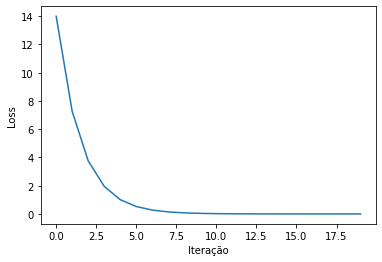

In [ ]:
import matplotlib.pyplot as plt

learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1)

X = []
Y = []
for i in range(iteracoes):
    J = J_func(w, x, y)
    X.append(i)
    Y.append(J)
    grad = (J_func(w + dw, x, y) - J_func(w - dw, x, y)) / 2 / dw
    w -= learning_rate * grad
    print('i =', i, '\tJ=', J, '\tgrad =',grad, '\tw =', w)

# Plote o gráfico da loss J pela iteração i
plt.plot(X, Y) 
plt.xlabel('Iteração')
plt.ylabel('Loss')
plt.show()

##Exercício 3.3

Repita o exercício 2 mas usando agora o calculando o gradiente usando o método backward() do pytorch. Confira se o primeiro valor do gradiente está de acordo com os valores anteriores. Execute essa próxima célula duas vezes. Os valores devem ser iguais.


i = 0 	J= tensor(14., grad_fn=<SumBackward0>) 	grad = tensor([-28.]) 	w = tensor([1.2800], requires_grad=True)
i = 1 	J= tensor(7.2576, grad_fn=<SumBackward0>) 	grad = tensor([-20.1600]) 	w = tensor([1.4816], requires_grad=True)
i = 2 	J= tensor(3.7623, grad_fn=<SumBackward0>) 	grad = tensor([-14.5152]) 	w = tensor([1.6268], requires_grad=True)
i = 3 	J= tensor(1.9504, grad_fn=<SumBackward0>) 	grad = tensor([-10.4509]) 	w = tensor([1.7313], requires_grad=True)
i = 4 	J= tensor(1.0111, grad_fn=<SumBackward0>) 	grad = tensor([-7.5247]) 	w = tensor([1.8065], requires_grad=True)
i = 5 	J= tensor(0.5241, grad_fn=<SumBackward0>) 	grad = tensor([-5.4178]) 	w = tensor([1.8607], requires_grad=True)
i = 6 	J= tensor(0.2717, grad_fn=<SumBackward0>) 	grad = tensor([-3.9008]) 	w = tensor([1.8997], requires_grad=True)
i = 7 	J= tensor(0.1409, grad_fn=<SumBackward0>) 	grad = tensor([-2.8086]) 	w = tensor([1.9278], requires_grad=True)
i = 8 	J= tensor(0.0730, grad_fn=<SumBackward0>) 	grad = tensor([-2

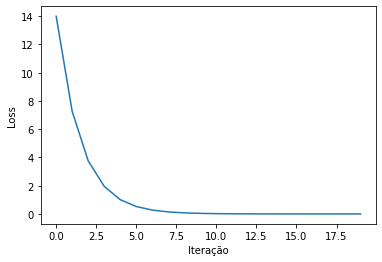

In [ ]:
learning_rate = 0.01
iteracoes = 20

x = torch.arange(0, 4).float()
y = torch.arange(0, 8, 2).float()
w = torch.ones(1, requires_grad=True)

X = []
Y = []
for i in range(iteracoes):
    J = J_func(w, x, y)
    X.append(i)
    Y.append(J.detach())
    J.backward()
    grad = w.grad
    with torch.no_grad():
        w -= learning_rate * grad
    print('i =', i, '\tJ=', J, '\tgrad =',grad, '\tw =', w)
    w.grad.zero_()

# Plote aqui a loss pela iteração
plt.plot(X, Y) 
plt.xlabel('Iteração')
plt.ylabel('Loss')
plt.show()

##Exercício 3.4

Quais são as restrições na escolha dos valores de $\Delta w$ no cálculo do gradiente por diferenças finitas?

**Resposta:** 
Matematicamente, a derivada é definida pelo limite em que $\Delta$x tende a zero, ou seja, quanto menor melhor. Com exceção de funções muito particulares como as funções lineares, valores grandes para $\Delta$x trarão valores de gradiente totalmente irreais. Ou seja, quanto menor, melhor. 

Computacionalmente, porém, valores muito pequenos de $\Delta$x podem ser arredondados para zero, levando a erro no cálculo. 

##Exercício 3.5

Até agora trabalhamos com $w$ contendo apenas um parâmetro. Suponha agora que $w$ seja uma matriz com $N$ parâmetros e que o custo para executar $(x_i w - y_i)^2$ seja $O(N)$.
> a) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método das diferencas finitas?
>
> b) Qual é o custo computacional para fazer uma única atualização (um passo de gradiente) dos parâmetros de $w$ usando o método do backpropagation?



Resposta (justifique):

a) 
Cada elemento do gradiente é calculado com custo de mesma ordem do cálculo da execução da função J, ou seja, é de $\mathcal{O}(N)$. 

Como, porém, o vetor gradiente é composto por N elementos, os quais, no método das diferenças finitas, devem ser calculados de forma iterada, a ordem do cálculo é $\mathcal{O}(N^2)$.

b)
Cada atualização de w corresponde a um percorrimento de grafo, em sentido inverso, idêntico ao forward pass, ou seja, a complexidade é a mesma $\mathcal{O}(N)$.

##Exercício 3.6

Qual o custo (entropia cruzada) esperado para um exemplo (uma amostra) no começo do treinamento de um classificador inicializado aleatoriamente?

A equação da entropia cruzada é:
$$L = - \sum_{j=0}^{K-1} y_j \log p_j, $$
Onde:

- K é o número de classes;

- $y_j=1$ se $j$ é a classe do exemplo (ground-truth), 0 caso contrário. Ou seja, $y$ é um vetor one-hot;

- $p_j$ é a probabilidade predita pelo modelo para a classe $j$.

A resposta tem que ser em função de uma ou mais das seguintes variáveis:

- K = número de classes

- B = batch size

- D = dimensão de qualquer vetor do modelo

- LR = learning rate


Resposta:
É esperado que cada exemplo tenha como valor de saída (0, 0, ..., 0, 1, 0, ..., 0), com um único valor 1 na j-ésima posição, ou seja, uma codificação one-hot. O valor de custo para este ponto será :

$$L = - \log p_j$$ 

A partir de uma inicialização aleatória, a probabilidade prevista esperada $p_j$ será $\frac 1 K = K^{-1}$. 
O custo então será:

$$L = - \log K^{-1} = \log K$$ 


Fim do notebook.